In [1]:
import pandas as pd
import numpy as np

In [2]:
import pandas as pd
import os

# Chemin du dossier contenant les fichiers CSV
chemin_dossier = "C:/Users/matte/Documents/Cyclistic_2023/fichier CSV original"

# Liste de tous les fichiers CSV dans le dossier
fichiers_csv = [f for f in os.listdir(chemin_dossier) if f.endswith('.csv')]

# Initialisation d'une liste pour stocker les DataFrames
dataframes = []

# Boucle pour lire chaque fichier CSV
for fichier in fichiers_csv:
    chemin_fichier = os.path.join(chemin_dossier, fichier)
    try:
        df = pd.read_csv(chemin_fichier)  # Lire le fichier CSV
        dataframes.append(df)  # Ajouter le DataFrame à la liste
    except Exception as e:
        print(f"Erreur lors de la lecture du fichier {fichier}: {e}")

# Fusionner tous les DataFrames en un seul
if dataframes:
    df_complet = pd.concat(dataframes, ignore_index=True)

    # Sauvegarder le fichier fusionné
    fichier_sortie = "C:/Users/matte/Documents/Cyclistic_2023/fichier_fusionne.csv"
    df_complet.to_csv(fichier_sortie, index=False)

    print(f"Fusion terminée. Fichier sauvegardé sous : {fichier_sortie}")
else:
    print("Aucun fichier n'a été fusionné.")



Fusion terminée. Fichier sauvegardé sous : C:/Users/matte/Documents/Cyclistic_2023/fichier_fusionne.csv


In [3]:
df_complet.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,903C30C2D810A53B,electric_bike,2023-08-19 15:41:53,2023-08-19 15:53:36,LaSalle St & Illinois St,13430,Clark St & Elm St,TA1307000039,41.890721,-87.631477,41.902973,-87.63128,member
1,F2FB18A98E110A2B,electric_bike,2023-08-18 15:30:18,2023-08-18 15:45:25,Clark St & Randolph St,TA1305000030,NaN,NaN,41.884511,-87.631550,41.930000,-87.64000,member
2,D0DEC7C94E4663DA,electric_bike,2023-08-30 16:15:08,2023-08-30 16:27:37,Clark St & Randolph St,TA1305000030,NaN,NaN,41.884981,-87.630793,41.910000,-87.63000,member
3,E0DDDC5F84747ED9,electric_bike,2023-08-30 16:24:07,2023-08-30 16:33:34,Wells St & Elm St,KA1504000135,NaN,NaN,41.903105,-87.634667,41.900000,-87.62000,member
4,7797A4874BA260CA,electric_bike,2023-08-22 15:59:44,2023-08-22 16:20:38,Clark St & Randolph St,TA1305000030,NaN,NaN,41.885548,-87.632019,41.890000,-87.68000,member


In [4]:
df_complet.shape

(5719877, 13)

In [5]:
df_complet.duplicated().sum()

np.int64(0)

In [6]:
df_complet.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    875716
start_station_id      875848
end_station_name      929202
end_station_id        929343
start_lat                  0
start_lng                  0
end_lat                 6990
end_lng                 6990
member_casual              0
dtype: int64

In [7]:
df_complet.describe()

,start_lat,start_lng,end_lat,end_lng
count,5.719877e+06,5.719877e+06,5.712887e+06,5.712887e+06
mean,4.190288e+01,-8.764704e+01,4.190322e+01,-8.764720e+01
std,4.505556e-02,2.733412e-02,5.444371e-02,6.919621e-02
min,4.163000e+01,-8.794000e+01,0.000000e+00,-8.816000e+01
25%,4.188096e+01,-8.766000e+01,4.188103e+01,-8.766027e+01
50%,4.189902e+01,-8.764403e+01,4.190000e+01,-8.764410e+01
75%,4.193000e+01,-8.762991e+01,4.193000e+01,-8.763000e+01
max,4.207000e+01,-8.746000e+01,4.218000e+01,0.000000e+00


In [8]:
df_complet.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object

In [9]:
print((df_complet['start_station_name'].isnull() == df_complet['start_station_id'].isnull()).all())
print((df_complet['end_station_name'].isnull() == df_complet['end_station_id'].isnull()).all())


False
False


In [10]:
# Cas où `start_station_name` est manquant mais pas `start_station_id`
start_name_missing = df_complet[df_complet['start_station_name'].isnull() & df_complet['start_station_id'].notnull()]
print(f"Nombre de cas où `start_station_name` est manquant mais pas `start_station_id` : {len(start_name_missing)}")

# Cas où `start_station_id` est manquant mais pas `start_station_name`
start_id_missing = df_complet[df_complet['start_station_id'].isnull() & df_complet['start_station_name'].notnull()]
print(f"Nombre de cas où `start_station_id` est manquant mais pas `start_station_name` : {len(start_id_missing)}")

# Répéter pour `end_station_name` et `end_station_id`
end_name_missing = df_complet[df_complet['end_station_name'].isnull() & df_complet['end_station_id'].notnull()]
print(f"Nombre de cas où `end_station_name` est manquant mais pas `end_station_id` : {len(end_name_missing)}")

end_id_missing = df_complet[df_complet['end_station_id'].isnull() & df_complet['end_station_name'].notnull()]
print(f"Nombre de cas où `end_station_id` est manquant mais pas `end_station_name` : {len(end_id_missing)}")


Nombre de cas où `start_station_name` est manquant mais pas `start_station_id` : 0
Nombre de cas où `start_station_id` est manquant mais pas `start_station_name` : 132
Nombre de cas où `end_station_name` est manquant mais pas `end_station_id` : 0
Nombre de cas où `end_station_id` est manquant mais pas `end_station_name` : 141


In [11]:
df_complet = df_complet.dropna(subset=['start_station_id', 'end_station_id'])


In [12]:
df_complet.isnull().sum()

ride_id                 0
rideable_type           0
started_at              0
ended_at                0
start_station_name      0
start_station_id        0
end_station_name        0
end_station_id          0
start_lat               0
start_lng               0
end_lat               116
end_lng               116
member_casual           0
dtype: int64

In [13]:
df_complet = df_complet.dropna(subset=['end_lat', 'end_lng'])


In [14]:
df_complet.isnull().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
dtype: int64

In [15]:
# Conversion des colonnes de dates
df_complet['started_at'] = pd.to_datetime(df_complet['started_at'])
df_complet['ended_at'] = pd.to_datetime(df_complet['ended_at'])

# Conversion des colonnes catégoriques
colonnes_categoriques = ['rideable_type', 'member_casual']
for col in colonnes_categoriques:
    df_complet[col] = df_complet[col].astype('category')

# Vérification des types après conversion
print(df_complet.dtypes)


ride_id                       object
rideable_type               category
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual               category
dtype: object


In [16]:
print(df_complet['started_at'].head())
print(df_complet['ended_at'].head())

0    2023-08-19 15:41:53
19   2023-08-11 14:27:09
20   2023-08-26 15:49:38
21   2023-08-30 16:00:07
22   2023-08-10 12:18:27
Name: started_at, dtype: datetime64[ns]
0    2023-08-19 15:53:36
19   2023-08-11 14:34:46
20   2023-08-26 16:11:55
21   2023-08-30 16:08:24
22   2023-08-10 12:23:37
Name: ended_at, dtype: datetime64[ns]


In [17]:
anomalies = df_complet[df_complet['ended_at'] < df_complet['started_at']]
print(f"Nombre de anomalies détectées : {len(anomalies)}")


Nombre de anomalies détectées : 66


In [18]:
print(anomalies.head())


                 ride_id  rideable_type          started_at  \
124094  88C6795EB8654AF5  electric_bike 2023-08-19 03:01:47   
179803  197D33FAF6396DDC  electric_bike 2023-08-18 16:01:29   
255730  82B071A054A869E0  electric_bike 2023-08-19 16:19:27   
346778  B4C9ECBF117035CD   classic_bike 2023-08-12 15:26:17   
348605  04F78532F71A60CB  electric_bike 2023-08-12 13:20:58   

                  ended_at            start_station_name start_station_id  \
124094 2023-08-19 03:00:12   Southport Ave & Belmont Ave            13229   
179803 2023-08-18 16:01:28  Stockton Dr & Wrightwood Ave            13276   
255730 2023-08-19 16:19:25     Larrabee St & Division St     KA1504000079   
346778 2023-08-12 15:14:41                Shedd Aquarium            15544   
348605 2023-08-12 13:18:59                Shedd Aquarium            15544   

                    end_station_name end_station_id  start_lat  start_lng  \
124094   Southport Ave & Belmont Ave          13229  41.939355 -87.663934   
1798

In [19]:
df_complet = df_complet[df_complet['ended_at'] >= df_complet['started_at']]


In [20]:
anomalies = df_complet[df_complet['ended_at'] < df_complet['started_at']]
print(f"Nombre de anomalies détectées : {len(anomalies)}")

Nombre de anomalies détectées : 0


In [21]:
print(df_complet['started_at'].head())
print(df_complet['ended_at'].head())

0    2023-08-19 15:41:53
19   2023-08-11 14:27:09
20   2023-08-26 15:49:38
21   2023-08-30 16:00:07
22   2023-08-10 12:18:27
Name: started_at, dtype: datetime64[ns]
0    2023-08-19 15:53:36
19   2023-08-11 14:34:46
20   2023-08-26 16:11:55
21   2023-08-30 16:08:24
22   2023-08-10 12:23:37
Name: ended_at, dtype: datetime64[ns]


In [22]:
df_complet['ride_duration'] = (df_complet['ended_at'] - df_complet['started_at']).dt.total_seconds() / 60  # en minutes


In [23]:
df_complet['start_date'] = df_complet['started_at'].dt.date
df_complet['start_hour'] = df_complet['started_at'].dt.hour


In [24]:
df_complet.dtypes

ride_id                       object
rideable_type               category
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual               category
ride_duration                float64
start_date                    object
start_hour                     int32
dtype: object

In [25]:
df_complet.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_duration,start_date,start_hour
0,903C30C2D810A53B,electric_bike,2023-08-19 15:41:53,2023-08-19 15:53:36,LaSalle St & Illinois St,13430,Clark St & Elm St,TA1307000039,41.890721,-87.631477,41.902973,-87.631280,member,11.716667,2023-08-19,15
19,6400344C80D626CA,electric_bike,2023-08-11 14:27:09,2023-08-11 14:34:46,Clark St & Randolph St,TA1305000030,Dearborn Pkwy & Delaware Pl,TA1307000128,41.884970,-87.631435,41.898969,-87.629912,member,7.616667,2023-08-11,14
20,B56F0D2EC8B33085,electric_bike,2023-08-26 15:49:38,2023-08-26 16:11:55,Sheffield Ave & Kingsbury St,13154,Sawyer Ave & Irving Park Rd,KA1504000096,41.910697,-87.653201,41.953586,-87.709311,member,22.283333,2023-08-26,15
21,EE2EF7362A4CE72A,electric_bike,2023-08-30 16:00:07,2023-08-30 16:08:24,Orleans St & Merchandise Mart Plaza,TA1305000022,Dearborn Pkwy & Delaware Pl,TA1307000128,41.888366,-87.637318,41.898969,-87.629912,member,8.283333,2023-08-30,16
22,82511E5639E5254E,electric_bike,2023-08-10 12:18:27,2023-08-10 12:23:37,Orleans St & Merchandise Mart Plaza,TA1305000022,Dearborn Pkwy & Delaware Pl,TA1307000128,41.887753,-87.636837,41.898969,-87.629912,member,5.166667,2023-08-10,12


In [26]:
# je recherche des valeurs manquantes et je vérifie les distributions
print(df_complet['ride_duration'].describe())


count    4.331641e+06
mean     1.595242e+01
std      3.608706e+01
min      0.000000e+00
25%      5.616667e+00
50%      9.800000e+00
75%      1.748333e+01
max      1.213630e+04
Name: ride_duration, dtype: float64


In [27]:
df_complet.isnull().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
ride_duration         0
start_date            0
start_hour            0
dtype: int64

In [28]:
df_complet.duplicated().sum()

np.int64(0)

In [29]:
# je calcule la distance en ligne droite entre la station de départ et d'arrivée avec la formule haversine
def haversine(lat1, lon1, lat2, lon2):
    # Rayon moyen de la Terre en km
    R = 6371.0  
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    return R * c

df_complet['distance_km'] = df_complet.apply(
    lambda row: haversine(row['start_lat'], row['start_lng'], row['end_lat'], row['end_lng']), axis=1
)

In [30]:
# je calcul la vitesse moyenne (distance/temps) pour chaque trajet
df_complet['average_speed_kmh'] = (df_complet['distance_km'] / (df_complet['ride_duration'] / 60))


In [31]:
# j'ajoute une colonne pour extraire le jour de la semaine(weekday)
df_complet['weekday'] = df_complet['started_at'].dt.day_name()


In [32]:
# je Classe les trajets en fonction de leur durée (courte, moyenne, longue)
bins = [0, 5, 20, 60, np.inf]
labels = ['Très court', 'Court', 'Moyen', 'Long']
df_complet['duration_category'] = pd.cut(df_complet['ride_duration'], bins=bins, labels=labels)


In [33]:
# j'ajoute une colonne indiquant si le trajet a eu lieu pendant une période de pointe (matin ou soir)
def is_peak_hour(hour):
    return 'Peak' if 7 <= hour <= 9 or 16 <= hour <= 19 else 'Off-Peak'

df_complet['peak_hour'] = df_complet['start_hour'].apply(is_peak_hour)

In [34]:
df_complet.head(10)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,end_lng,member_casual,ride_duration,start_date,start_hour,distance_km,average_speed_kmh,weekday,duration_category,peak_hour
0,903C30C2D810A53B,electric_bike,2023-08-19 15:41:53,2023-08-19 15:53:36,LaSalle St & Illinois St,13430,Clark St & Elm St,TA1307000039,41.890721,-87.631477,...,-87.631280,member,11.716667,2023-08-19,15,1.362420,6.976833,Saturday,Court,Off-Peak
19,6400344C80D626CA,electric_bike,2023-08-11 14:27:09,2023-08-11 14:34:46,Clark St & Randolph St,TA1305000030,Dearborn Pkwy & Delaware Pl,TA1307000128,41.884970,-87.631435,...,-87.629912,member,7.616667,2023-08-11,14,1.561698,12.302216,Friday,Court,Off-Peak
20,B56F0D2EC8B33085,electric_bike,2023-08-26 15:49:38,2023-08-26 16:11:55,Sheffield Ave & Kingsbury St,13154,Sawyer Ave & Irving Park Rd,KA1504000096,41.910697,-87.653201,...,-87.709311,member,22.283333,2023-08-26,15,6.654897,17.918946,Saturday,Moyen,Off-Peak
21,EE2EF7362A4CE72A,electric_bike,2023-08-30 16:00:07,2023-08-30 16:08:24,Orleans St & Merchandise Mart Plaza,TA1305000022,Dearborn Pkwy & Delaware Pl,TA1307000128,41.888366,-87.637318,...,-87.629912,member,8.283333,2023-08-30,16,1.328825,9.625293,Wednesday,Court,Peak
22,82511E5639E5254E,electric_bike,2023-08-10 12:18:27,2023-08-10 12:23:37,Orleans St & Merchandise Mart Plaza,TA1305000022,Dearborn Pkwy & Delaware Pl,TA1307000128,41.887753,-87.636837,...,-87.629912,member,5.166667,2023-08-10,12,1.372621,15.940119,Thursday,Court,Off-Peak
23,56D52B6F72CBF23C,electric_bike,2023-08-15 21:54:01,2023-08-15 21:58:03,Wells St & Elm St,KA1504000135,Dearborn Pkwy & Delaware Pl,TA1307000128,41.903106,-87.634718,...,-87.629912,member,4.033333,2023-08-15,21,0.608139,9.046694,Tuesday,Très court,Off-Peak
24,98125D4DFC8E910E,classic_bike,2023-08-09 19:28:02,2023-08-09 19:36:28,Clark St & Randolph St,TA1305000030,Dearborn Pkwy & Delaware Pl,TA1307000128,41.884576,-87.631890,...,-87.629912,member,8.433333,2023-08-09,19,1.608756,11.445692,Wednesday,Court,Peak
25,74554645A3C864D8,classic_bike,2023-08-07 20:02:13,2023-08-07 20:13:29,Franklin St & Monroe St,TA1309000007,McClurg Ct & Ohio St,TA1306000029,41.880317,-87.635185,...,-87.617289,member,11.266667,2023-08-07,20,2.014375,10.727443,Monday,Court,Off-Peak
26,D1A5A2CD95B55354,classic_bike,2023-08-08 19:27:47,2023-08-08 19:35:26,State St & Randolph St,TA1305000029,McClurg Ct & Ohio St,TA1306000029,41.884621,-87.627834,...,-87.617289,member,7.650000,2023-08-08,19,1.244012,9.756956,Tuesday,Court,Peak
27,30A52971D41B2EBA,classic_bike,2023-08-03 07:15:24,2023-08-03 07:35:12,Calumet Ave & 18th St,13102,Canal St & Jackson Blvd,13138,41.857618,-87.619411,...,-87.639366,member,19.800000,2023-08-03,7,2.737453,8.295313,Thursday,Court,Peak


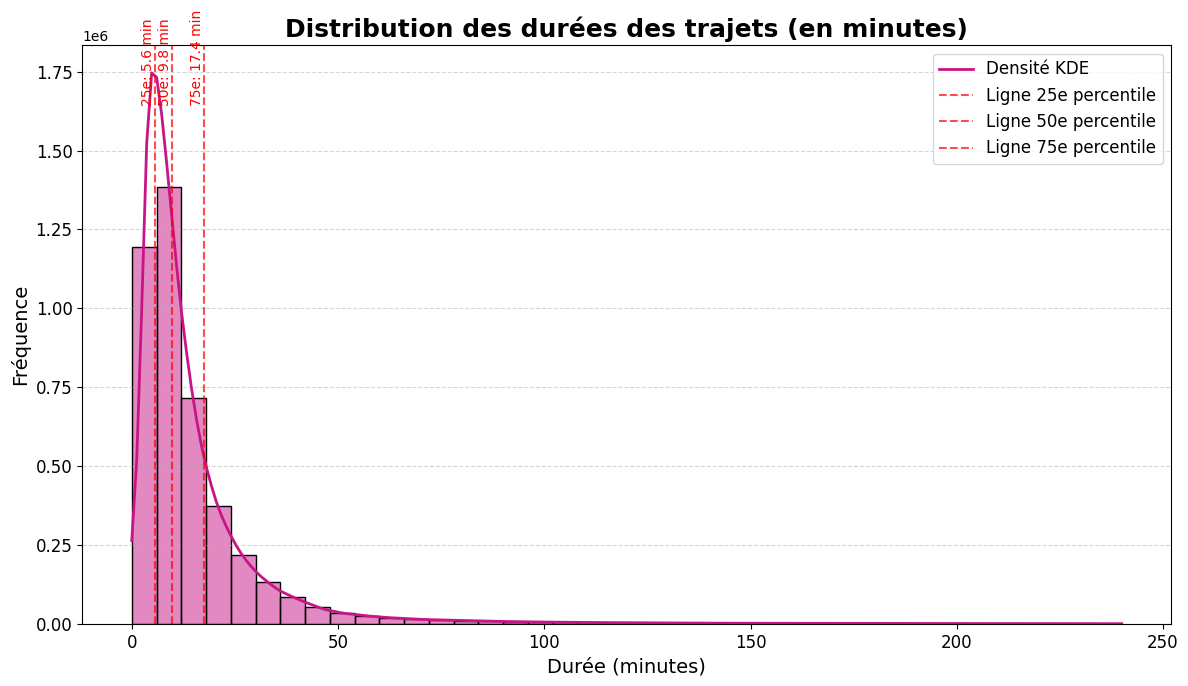

In [49]:
# Distribution des durées de trajet
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrer les durées pour exclure les valeurs aberrantes (ex. > 240 min)
filtered_df = df_complet[df_complet['ride_duration'] <= 240]

# Créer le graphique
plt.figure(figsize=(12, 7))  # Taille augmentée pour plus de clarté
sns.histplot(
    filtered_df['ride_duration'], 
    bins=40,  # Ajuster le nombre de bins pour éviter trop de granularité
    kde=True,  # Ajouter une courbe KDE pour une meilleure visualisation
    color='mediumvioletred',  # Couleur vive et attrayante
    line_kws={'linewidth': 2}  # Épaissir la courbe KDE
)

# Ajout de lignes de référence pour les percentiles (25e, 50e, 75e)
percentiles = [25, 50, 75]
percentile_values = filtered_df['ride_duration'].quantile([p / 100 for p in percentiles])
for p, value in zip(percentiles, percentile_values):
    plt.axvline(value, color='red', linestyle='--', alpha=0.7)
    plt.text(value, plt.ylim()[1] * 0.9, f"{p}e: {value:.1f} min", color='red', fontsize=10, rotation=90, ha='right')

# Ajout d'un titre et des labels clairs
plt.title('Distribution des durées des trajets (en minutes)', fontsize=18, fontweight='bold')
plt.xlabel('Durée (minutes)', fontsize=14)
plt.ylabel('Fréquence', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Ajout d'une légende expliquant les lignes de percentiles
plt.legend(['Densité KDE'] + [f'Ligne {p}e percentile' for p in percentiles], fontsize=12, loc='upper right')

# Ajout d'une grille discrète pour améliorer la lisibilité
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Optimisation de la mise en page
plt.tight_layout()

# Afficher le graphique
plt.show()




C:\Users\matte\AppData\Local\Temp\ipykernel_23356\1301627070.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


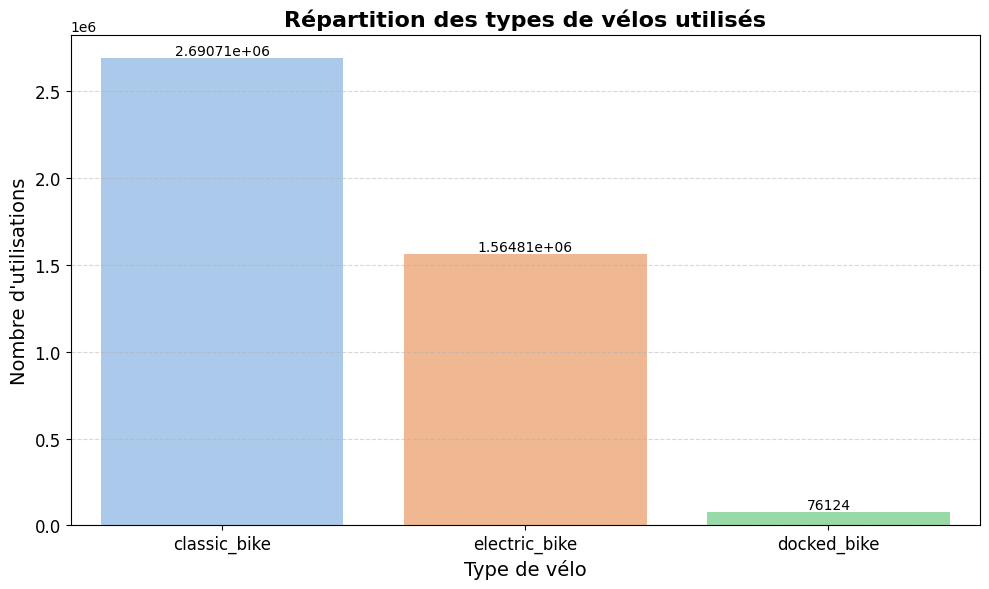

In [48]:
# Répartition des types de vélos
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))

# Création du graphique avec une palette distinctive
sns.countplot(
    x='rideable_type', 
    data=df_complet, 
    palette='pastel',  # Palette douce et attrayante
    order=df_complet['rideable_type'].value_counts().index  # Tri basé sur les fréquences
)

# Ajout d'un titre et des labels bien formatés
plt.title('Répartition des types de vélos utilisés', fontsize=16, fontweight='bold')
plt.xlabel('Type de vélo', fontsize=14)
plt.ylabel('Nombre d\'utilisations', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Ajout des annotations sur les barres
for container in plt.gca().containers:
    plt.bar_label(container, fontsize=10, label_type='edge', color='black')

# Ajout d'une grille discrète
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Optimisation de la mise en page
plt.tight_layout()

# Afficher le graphique
plt.show()



C:\Users\matte\AppData\Local\Temp\ipykernel_23356\1910137402.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


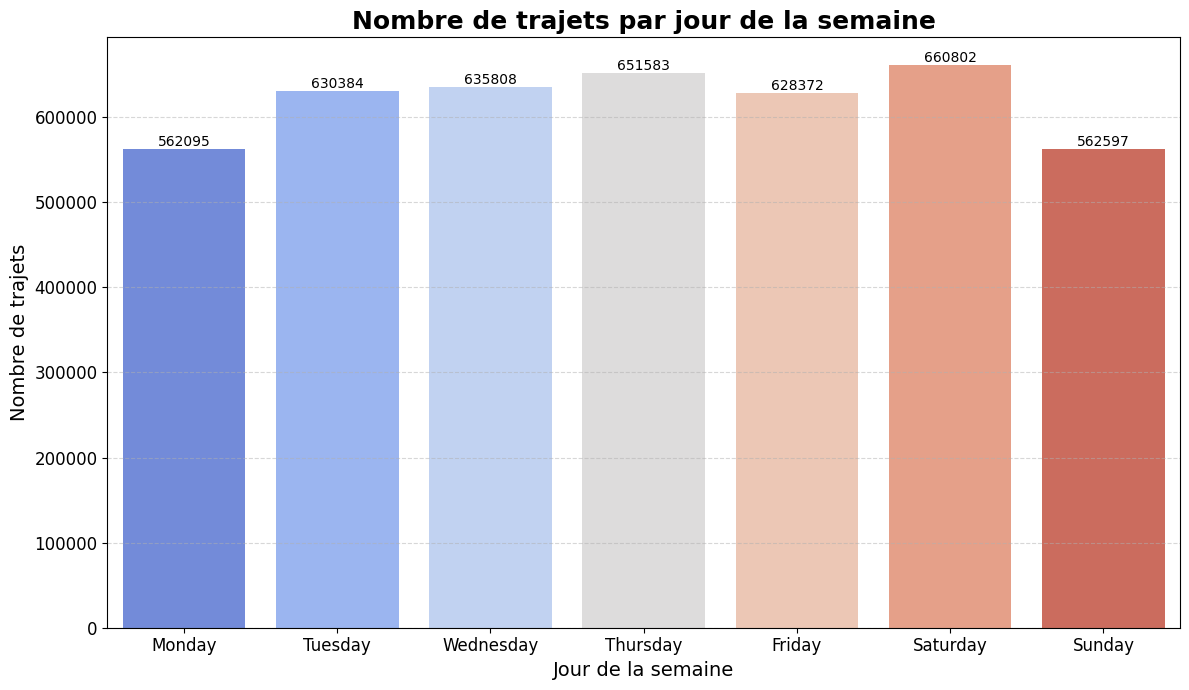

In [47]:
# Nombre de trajets par jour de la semaine  
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 7))

# Création du graphique avec une palette distincte et un tri explicite
sns.countplot(
    x='weekday', 
    data=df_complet, 
    order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    palette='coolwarm'  # Palette de couleurs attractive
)

# Ajout d'un titre et des labels bien formatés
plt.title('Nombre de trajets par jour de la semaine', fontsize=18, fontweight='bold')
plt.xlabel('Jour de la semaine', fontsize=14)
plt.ylabel('Nombre de trajets', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Ajout des annotations sur les barres
for container in plt.gca().containers:
    plt.bar_label(container, fontsize=10, label_type='edge', color='black')

# Ajout d'une grille discrète sur l'axe des y
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Optimiser la mise en page
plt.tight_layout()

# Afficher le graphique
plt.show()


C:\Users\matte\AppData\Local\Temp\ipykernel_23356\3215270637.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


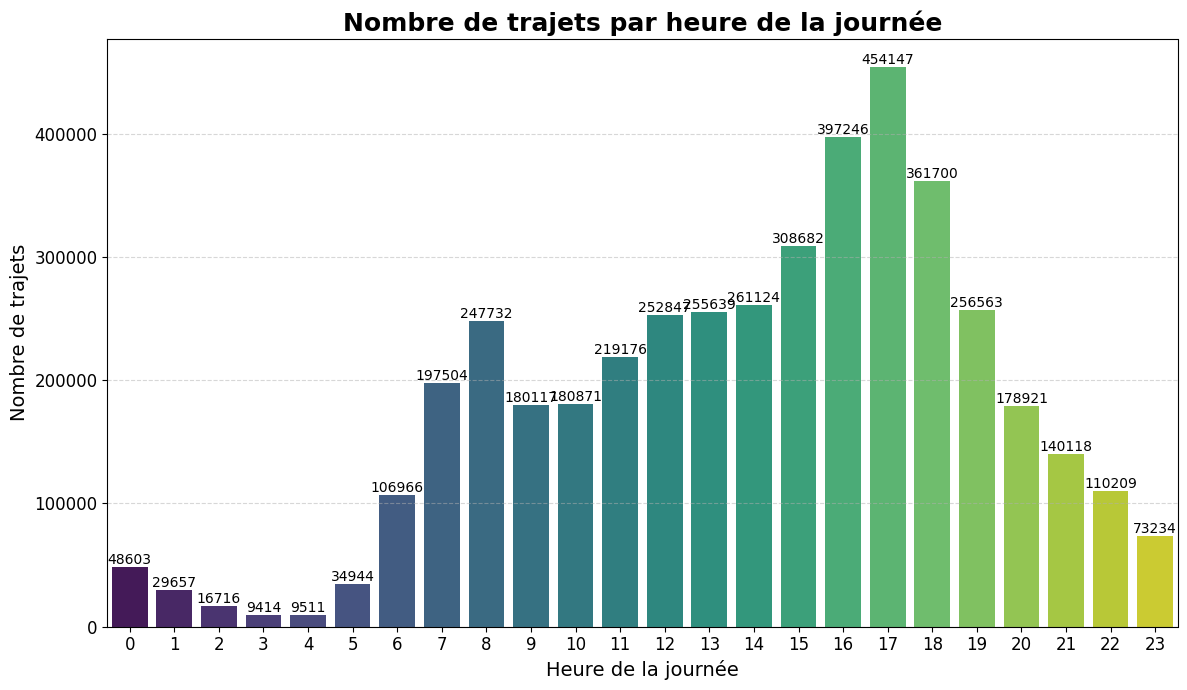

In [46]:
# Nombre de trajets par heure de la journée
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 7))


sns.countplot(
    x='start_hour', 
    data=df_complet, 
    palette='viridis',  # Palette colorée pour une meilleure lisibilité
    order=sorted(df_complet['start_hour'].unique())  # S'assurer que les heures sont triées
)

# Ajout d'un titre et des labels plus clairs
plt.title('Nombre de trajets par heure de la journée', fontsize=18, fontweight='bold')
plt.xlabel('Heure de la journée', fontsize=14)
plt.ylabel('Nombre de trajets', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Ajout des annotations sur les barres
for container in plt.gca().containers:
    plt.bar_label(container, fontsize=10, label_type='edge', color='black')

# Ajout d'une grille subtile
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Optimisation de la mise en page
plt.tight_layout()

# Afficher le graphique
plt.show()


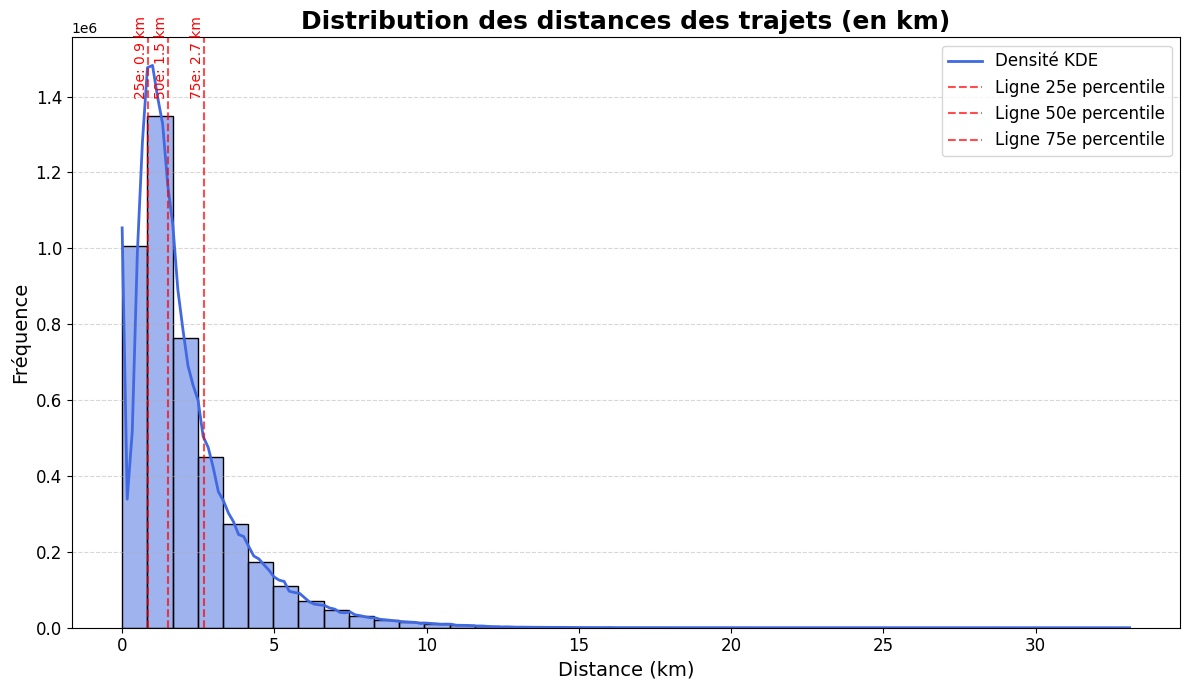

In [45]:
# Analyse des distances
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrer les distances pour exclure les valeurs aberrantes (par exemple, > 50 km)
filtered_df = df_complet[df_complet['distance_km'] <= 50]

# Créer le graphique
plt.figure(figsize=(12, 7))  # Taille légèrement augmentée pour plus de lisibilité
sns.histplot(
    filtered_df['distance_km'], 
    bins=40,  # Réduire légèrement le nombre de bins pour un affichage plus lisse
    kde=True,  # Garder l'estimation de densité pour montrer la tendance
    color='royalblue',  # Couleur plus vive
    line_kws={'linewidth': 2}  # Épaissir la courbe KDE
)

# Ajout de lignes de référence pour des percentiles clés
percentiles = [25, 50, 75]
percentile_values = filtered_df['distance_km'].quantile([p / 100 for p in percentiles])
for p, value in zip(percentiles, percentile_values):
    plt.axvline(value, color='red', linestyle='--', alpha=0.7)
    plt.text(value, plt.ylim()[1] * 0.9, f"{p}e: {value:.1f} km", color='red', fontsize=10, rotation=90, ha='right')

# Ajout d'un titre et des labels plus clairs
plt.title('Distribution des distances des trajets (en km)', fontsize=18, fontweight='bold')
plt.xlabel('Distance (km)', fontsize=14)
plt.ylabel('Fréquence', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Ajout d'une légende pour les lignes
plt.legend(['Densité KDE'] + [f'Ligne {p}e percentile' for p in percentiles], fontsize=12, loc='upper right')

# Ajout d'une grille plus subtile
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Optimisation de la mise en page
plt.tight_layout()

# Afficher le graphique
plt.show()


C:\Users\matte\AppData\Local\Temp\ipykernel_23356\1179053195.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\matte\AppData\Local\Temp\ipykernel_23356\1179053195.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medians = df_complet.groupby(['member_casual'])['ride_duration'].median()


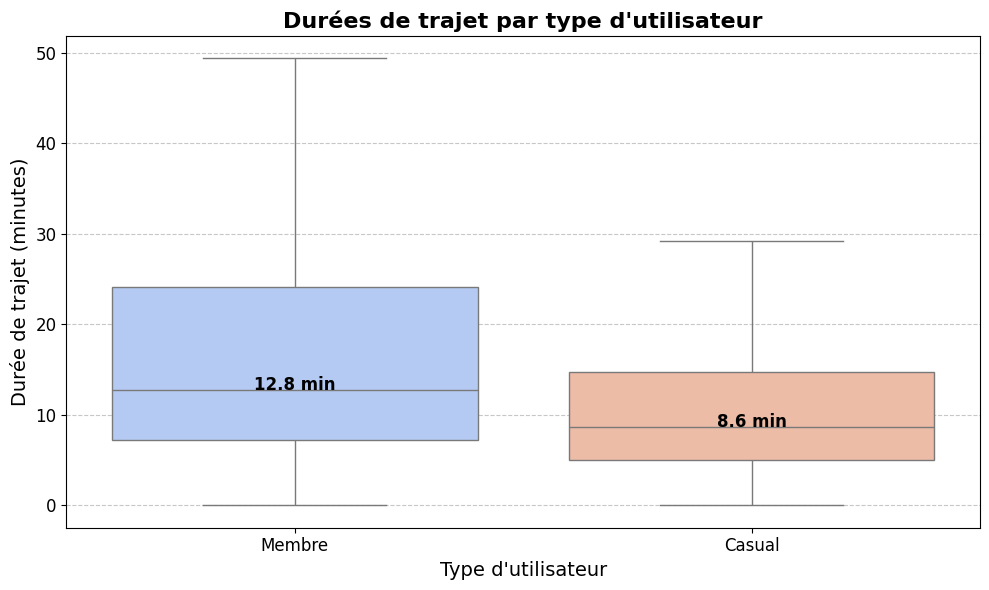

In [44]:
# Répartition des durées de trajet par type d'utilisateur
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))  # Augmenter la taille de la figure pour plus de clarté
sns.boxplot(
    x='member_casual', 
    y='ride_duration', 
    data=df_complet, 
    palette='coolwarm',  # Palette de couleurs contrastées
    showfliers=False  # Masquer les valeurs aberrantes pour une meilleure échelle
)

# Ajout des labels et du titre
plt.title('Durées de trajet par type d\'utilisateur', fontsize=16, fontweight='bold')
plt.xlabel('Type d\'utilisateur', fontsize=14)
plt.ylabel('Durée de trajet (minutes)', fontsize=14)
plt.xticks(fontsize=12, ticks=[0, 1], labels=['Membre', 'Casual'])
plt.yticks(fontsize=12)

# Ajout des annotations pour les médianes
medians = df_complet.groupby(['member_casual'])['ride_duration'].median()
for i, median in enumerate(medians):
    plt.text(i, median, f'{median:.1f} min', 
             horizontalalignment='center', 
             color='black', 
             fontsize=12, 
             fontweight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.7)  # Ajout d'une grille pour faciliter la lecture
plt.tight_layout()
plt.show()


In [41]:
# Quelles sont les stations les plus populaires en départ et en arrivée ?
top_start_stations = df_complet['start_station_name'].value_counts().head(10)
top_end_stations = df_complet['end_station_name'].value_counts().head(10)
print("Stations de départ les plus populaires :\n", top_start_stations)
print("Stations d'arrivée les plus populaires :\n", top_end_stations)


Stations de départ les plus populaires :
 start_station_name
Streeter Dr & Grand Ave               59614
DuSable Lake Shore Dr & Monroe St     38014
Michigan Ave & Oak St                 34780
DuSable Lake Shore Dr & North Blvd    33163
Clark St & Elm St                     32967
Kingsbury St & Kinzie St              32304
Clinton St & Washington Blvd          30224
Wells St & Concord Ln                 30045
Millennium Park                       28109
Theater on the Lake                   28039
Name: count, dtype: int64
Stations d'arrivée les plus populaires :
 end_station_name
Streeter Dr & Grand Ave               61713
DuSable Lake Shore Dr & North Blvd    37301
DuSable Lake Shore Dr & Monroe St     36211
Michigan Ave & Oak St                 35775
Clark St & Elm St                     32313
Kingsbury St & Kinzie St              31651
Clinton St & Washington Blvd          31012
Wells St & Concord Ln                 30969
Millennium Park                       29543
Theater on the Lak

C:\Users\matte\AppData\Local\Temp\ipykernel_23356\2385614734.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\matte\AppData\Local\Temp\ipykernel_23356\2385614734.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medians = df_complet.groupby(['rideable_type'])['distance_km'].median()


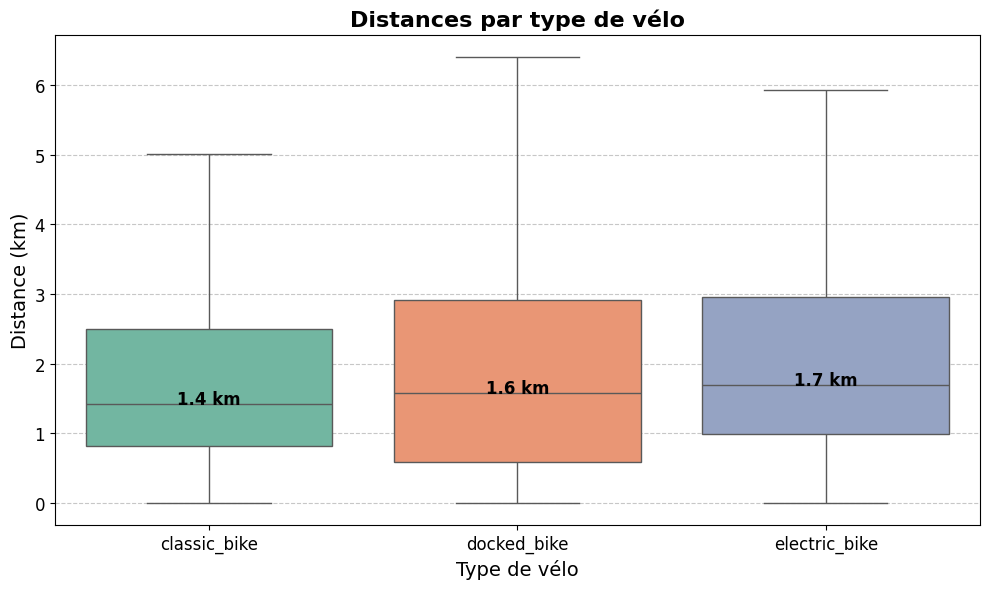

In [43]:
# Les vélos électriques sont-ils utilisés pour des trajets plus longs en moyenne ?
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))  # Augmentation de la taille de la figure pour plus de clarté
sns.boxplot(
    x='rideable_type', 
    y='distance_km', 
    data=df_complet, 
    palette='Set2',  # Utilisation de couleurs plus distinctes
    showfliers=False  # Masquer les valeurs aberrantes pour éviter que l'échelle soit biaisée
)

# Ajout des labels et du titre
plt.title('Distances par type de vélo', fontsize=16, fontweight='bold')
plt.xlabel('Type de vélo', fontsize=14)
plt.ylabel('Distance (km)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Ajout des annotations sur les médianes pour chaque type de vélo
medians = df_complet.groupby(['rideable_type'])['distance_km'].median()
for i, median in enumerate(medians):
    plt.text(i, median, f'{median:.1f} km', 
             horizontalalignment='center', 
             color='black', 
             fontsize=12, 
             fontweight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.7)  # Ajout d'une grille pour une meilleure lecture
plt.tight_layout()
plt.show()


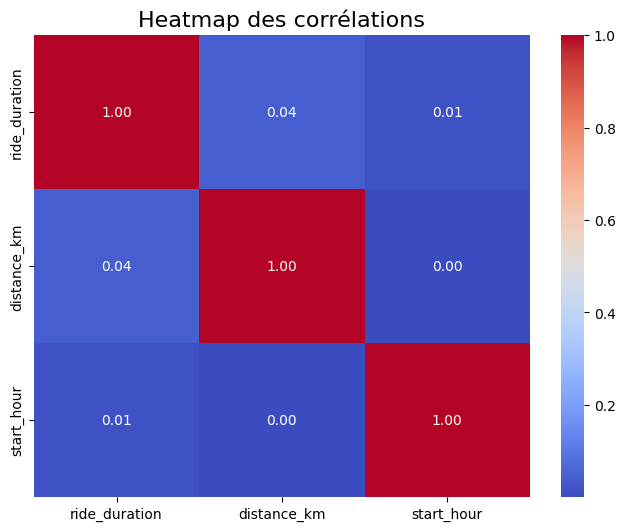

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcul de la matrice de corrélation
correlation_matrix = df_complet[['ride_duration', 'distance_km', 'start_hour']].corr()

# Création de la heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap des corrélations', fontsize=16)
plt.show()


In [ ]:
import folium
from folium.plugins import HeatMap

# Extraction des données pertinentes (par exemple, les 1000 trajets les plus fréquents)
top_rides = df_complet[['start_lat', 'start_lng']].sample(1000)

# Création d'une carte centrée
m = folium.Map(location=[top_rides['start_lat'].mean(), top_rides['start_lng'].mean()], zoom_start=12)

# Ajout des points sous forme de heatmap
HeatMap(top_rides[['start_lat', 'start_lng']].values.tolist(), radius=8).add_to(m)

# Afficher la carte
m.save("trajets_populaires.html")
